## Homework 4: Evaluation Metrics for Classification

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.


In this homework, we will use the Bank Marketing dataset. Download it from [here](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

You can do it with `wget`:

```bash
wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
unzip bank+marketing.zip 
unzip bank.zip
```

We need `bank-full.csv`.

In this dataset the target variable is `y` variable - has the client subscribed a term deposit or not. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = "../03-classification/bank/bank-full.csv"

In [3]:
df = pd.read_csv(data, sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Dataset preparation

For the rest of the homework, you'll need to use only these columns:

* `'age'`,
* `'job'`,
* `'marital'`,
* `'education'`,
* `'balance'`,
* `'housing'`,
* `'contact'`,
* `'day'`,
* `'month'`,
* `'duration'`,
* `'campaign'`,
* `'pdays'`,
* `'previous'`,
* `'poutcome'`,
* `'y'`



Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
filter_list = ['age', 'job', 'marital', 'education', 'balance', 'housing', 
               'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
               'previous', 'poutcome', 'y']

In [6]:
df = df[filter_list]
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
df.shape

(45211, 15)

In [8]:
df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5
month,may,may,may,may,may
duration,261,151,76,92,198


In [9]:
# Check for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df.nunique()

age            77
job            12
marital         3
education       4
balance      7168
housing         2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [12]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [13]:
numerical = list(df.select_dtypes("number").columns)
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [14]:
categorical = list(df.select_dtypes("object").columns.drop('y'))
categorical

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [15]:
df.y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [16]:
# Replace yes/no with 1/0
df = df.assign(y = (df.y == 'yes').astype(int))
df.y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [17]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,45201,45202,45203,45204,45205,45206,45207,45208,45209,45210
age,58,44,33,47,33,35,28,42,58,43,...,53,34,23,73,25,51,71,72,57,37
job,management,technician,entrepreneur,blue-collar,unknown,management,management,entrepreneur,retired,technician,...,management,admin.,student,retired,technician,technician,retired,retired,blue-collar,entrepreneur
marital,married,single,married,married,single,married,single,divorced,married,single,...,married,single,single,married,single,married,divorced,married,married,married
education,tertiary,secondary,secondary,unknown,unknown,tertiary,tertiary,tertiary,primary,secondary,...,tertiary,secondary,tertiary,secondary,secondary,tertiary,primary,secondary,secondary,secondary
balance,2143,29,2,1506,1,231,447,2,121,593,...,583,557,113,2850,505,825,1729,5715,668,2971
housing,yes,yes,yes,yes,no,yes,yes,yes,yes,yes,...,no,no,no,no,no,no,no,no,no,no
contact,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,...,cellular,cellular,cellular,cellular,cellular,cellular,cellular,cellular,telephone,cellular
day,5,5,5,5,5,5,5,5,5,5,...,17,17,17,17,17,17,17,17,17,17
month,may,may,may,may,may,may,may,may,may,may,...,nov,nov,nov,nov,nov,nov,nov,nov,nov,nov
duration,261,151,76,92,198,139,217,380,50,55,...,226,224,266,300,386,977,456,1127,508,361


In [18]:
from sklearn.model_selection import train_test_split

SEED = 1

# Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

In [19]:
df_train.shape[0], df_val.shape[0], df_test.shape[0]

(27126, 9042, 9043)

In [20]:
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [21]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

# Delete the target value y from dataframe
df_train = df_train.drop('y', axis=1)
df_val = df_val.drop('y', axis=1)
df_test = df_test.drop('y', axis=1)

assert 'y' not in df_train.columns
assert 'y' not in df_val.columns
assert 'y' not in df_test.columns

In [22]:
df_train.head().T

,0,1,2,3,4
age,56,33,32,40,54
job,entrepreneur,technician,technician,admin.,unemployed
marital,married,married,single,divorced,married
education,tertiary,secondary,tertiary,secondary,tertiary
balance,40,4790,392,2129,1180
housing,no,yes,yes,no,no
contact,cellular,cellular,cellular,cellular,cellular
day,11,20,21,30,19
month,jul,apr,nov,apr,nov
duration,123,137,148,452,394


In [23]:
df_full_train.shape, df_train.shape, df_val.shape, df_test.shape

((36168, 15), (27126, 14), (9042, 14), (9043, 14))

### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score (aka prediction) and compute the AUC with the `y` variable as ground truth.
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['engine_hp']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `balance`
- `day`
- `duration`
- `previous`

In [24]:
df_train[numerical]

,age,balance,day,duration,campaign,pdays,previous
0,56,40,11,123,2,-1,0
1,33,4790,20,137,1,272,2
2,32,392,21,148,2,-1,0
3,40,2129,30,452,1,-1,0
4,54,1180,19,394,2,-1,0
...,...,...,...,...,...,...,...
27121,32,195,22,239,2,-1,0
27122,52,3720,20,114,2,-1,0
27123,52,289,21,45,13,-1,0
27124,32,312,11,67,4,-1,0


In [25]:
from sklearn.metrics import roc_auc_score

def roc_auc_numerical_var_score(series):
    auc = roc_auc_score(y_train, series)
    if auc < 0.5:
        auc = roc_auc_score(y_train, -series)
    return auc

In [26]:
# Calculate AUC for all numerical variables
aucs = df_train[numerical].apply(roc_auc_numerical_var_score)

# Sort the result such that features with highest AUC come first
aucs.sort_values(ascending=False)

duration    0.814700
previous    0.598565
pdays       0.590128
balance     0.588831
campaign    0.571454
day         0.525958
age         0.512186
dtype: float64

In [27]:
options = ['balance', 'day', 'duration', 'previous']

results = [(var, auc) for var, auc in aucs.items() if var in options]
max(results, key=lambda x: x[1])

('duration', 0.8147002759670778)

**Ans:** `duration` has the highest AUC among the 4 numerical variables.

### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.69
- 0.79
- 0.89
- 0.99

In [28]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [29]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [30]:
dv, model = train(df_train, y_train)

In [31]:
dv.get_feature_names_out()

array(['age', 'balance', 'campaign', 'contact=cellular',
       'contact=telephone', 'contact=unknown', 'day', 'duration',
       'education=primary', 'education=secondary', 'education=tertiary',
       'education=unknown', 'housing=no', 'housing=yes', 'job=admin.',
       'job=blue-collar', 'job=entrepreneur', 'job=housemaid',
       'job=management', 'job=retired', 'job=self-employed',
       'job=services', 'job=student', 'job=technician', 'job=unemployed',
       'job=unknown', 'marital=divorced', 'marital=married',
       'marital=single', 'month=apr', 'month=aug', 'month=dec',
       'month=feb', 'month=jan', 'month=jul', 'month=jun', 'month=mar',
       'month=may', 'month=nov', 'month=oct', 'month=sep', 'pdays',
       'poutcome=failure', 'poutcome=other', 'poutcome=success',
       'poutcome=unknown', 'previous'], dtype=object)

In [32]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [33]:
y_pred = predict(df_val, dv, model)
y_pred

array([0.02915846, 0.02367161, 0.02150487, ..., 0.23990718, 0.00222657,
       0.03858971])

In [34]:
auc = roc_auc_score(y_val, y_pred)
auc

np.float64(0.9006884713944792)

In [35]:
round(auc, 3)

np.float64(0.901)

**Ans:** The AUC of this model on the validation dataset is `0.901`. Because my answer doesn't match one of the options exactly, the closest AUC to my solution would be `0.89`. 

### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.265
* 0.465
* 0.665
* 0.865

In [36]:
from sklearn.metrics import precision_score, recall_score

In [53]:
# Create an array to store thresholds from 0.0 to 1.0 with step 0.01
thresholds = np.arange(0.0, 1.0, 0.01)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [54]:
precisions = []
recalls = []

# Iterate over each threshold and calculate precision and recall
for t in thresholds:
    y_pred_threshold = (y_pred >= t).astype(int)

    precision = precision_score(y_val, y_pred_threshold)
    recall = recall_score(y_val, y_pred_threshold)

    precisions.append(precision)
    recalls.append(recall)

In [55]:
# Convert lists to numpy arrays for analysis
precisions = np.array(precisions)
recalls = np.array(recalls)

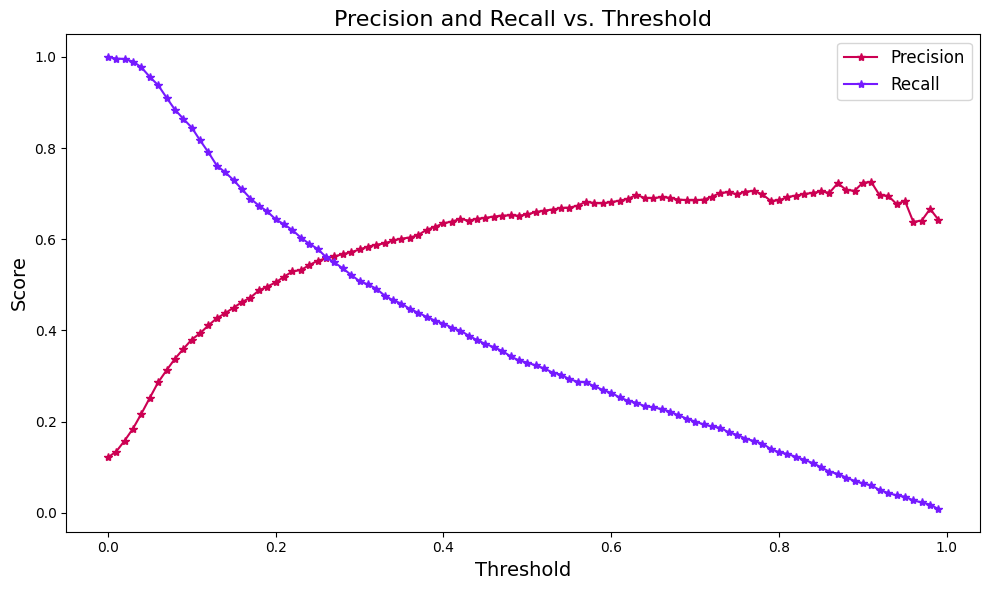

In [81]:
plt.figure(figsize=(10, 6))

plt.plot(thresholds, precisions, label='Precision', marker='*', color='#cc0052', linestyle='-', markersize=6)
plt.plot(thresholds, recalls, label='Recall', marker='*', color='#751aff', linestyle='-', markersize=6)

plt.title('Precision and Recall vs. Threshold', fontsize=16)
plt.xlabel('Threshold', fontsize=14)
plt.ylabel('Score', fontsize=14)

plt.legend(loc='best', fontsize=12)

plt.tight_layout()
plt.show()

In [57]:
precisions[:28]

array([0.12143331, 0.13439803, 0.15819945, 0.18476968, 0.21742655,
       0.25210084, 0.28627015, 0.31269543, 0.33797424, 0.3594697 ,
       0.38017206, 0.39393939, 0.41137441, 0.42696629, 0.43803419,
       0.45025295, 0.46231454, 0.47223955, 0.48780488, 0.4962406 ,
       0.50536097, 0.51788376, 0.52954899, 0.53253012, 0.54316848,
       0.55304348, 0.55797101, 0.5625    ])

In [58]:
recalls[:28]

array([1.        , 0.99635701, 0.99544627, 0.98998179, 0.97723133,
       0.95628415, 0.93806922, 0.91074681, 0.88433515, 0.86429872,
       0.84517304, 0.81693989, 0.79052823, 0.76138434, 0.74681239,
       0.7295082 , 0.70947177, 0.68943534, 0.67395264, 0.66120219,
       0.643898  , 0.63296903, 0.62021858, 0.60382514, 0.59016393,
       0.57923497, 0.56102004, 0.54918033])

In [59]:
# Calculate absolute differences between precision and recall
differences = np.abs(precisions - recalls)
differences[:28]

array([0.87856669, 0.86195898, 0.83724682, 0.80521211, 0.75980478,
       0.70418331, 0.65179907, 0.59805138, 0.54636091, 0.50482903,
       0.46500098, 0.4230005 , 0.37915383, 0.33441804, 0.3087782 ,
       0.27925525, 0.24715723, 0.21719579, 0.18614776, 0.16496158,
       0.13853702, 0.11508528, 0.09066959, 0.07129502, 0.04699545,
       0.02619149, 0.00304902, 0.01331967])

In [60]:
min_index = np.argmin(differences)
min_index

np.int64(26)

If the threshold is 0 or 1, the FPR and Recall scores are the opposite of the threshold (1 and 0 respectively). 

The smallest absolute difference identifies the threshold where precision and recall are closest (might not be the exact point where precision and recall intersect if they are not perfectly equal at that threshold)

`np.argmin(differences)` - returns the index of the smallest value in the differences array.

In [61]:
thresholds[min_index], thresholds[min_index + 1]

(np.float64(0.26), np.float64(0.27))

Since we evaluate precision and recall at discrete threshold values (e.g., 0.00, 0.01, 0.02, ..., 1.00), it’s possible that precision and recall do not exactly intersect at any one of these predefined thresholds. They might actually intersect somewhere between two thresholds.

As such, we start by finding the threshold where precision and recall are closest as indicated by the smallest absolute difference between precision and recall. The `min_index` gives us the closest threshold, not the exact point where precision and recall intersect if they are not perfectly equal at that threshold.

To refine the precision and recall intersection point, we need to take the average of the two thresholds where the precision-recall values are closest. This approach gives us a more precise approximation of where the curves intersect because it estimates the intersection between two adjacent thresholds (i.e., the midpoint).

In summary, if precision and recall curves don't intersect exactly at one of the given thresholds, taking the midpoint between the two closest thresholds can provide a more accurate estimation of the intersection point.

In our case, precision and recall curves come very close between thresholds 0.26 and 0.27. While the absolute closest might be at 0.26, the actual intersection could be slightly after 0.26 but before 0.27. Taking the midpoint between 0.26 and 0.27 will give us a more accurate approximation of the intersection. The approach refines the threshold by narrowing the gap between two consecutive thresholds where precision and recall are closest. 

In [62]:
# Find the threshold where precision and recall intersect

# Refine the precision and recall intersection point by taking the average of the 
# two thresholds where the precision-recall values are closest as seen in differences
intersection_threshold = (thresholds[min_index] + thresholds[min_index + 1]) / 2
intersection_threshold

np.float64(0.265)

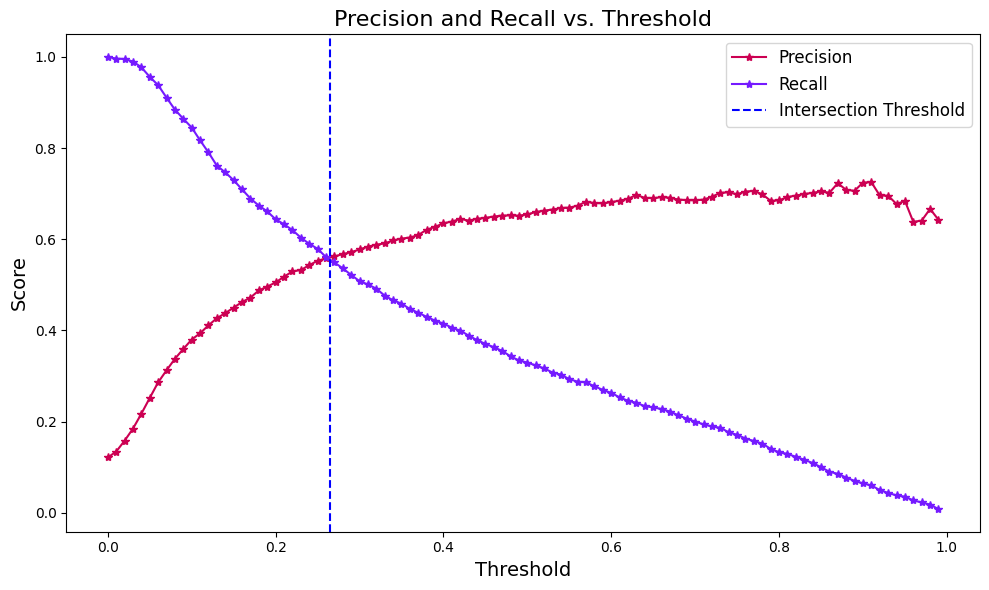

In [80]:
plt.figure(figsize=(10, 6))

plt.plot(thresholds, precisions, label='Precision', marker='*', color='#cc0052', linestyle='-', markersize=6)

plt.plot(thresholds, recalls, label='Recall', marker='*', color='#751aff', linestyle='-', markersize=6)

plt.axvline(x=intersection_threshold, color='blue', linestyle='--', label='Intersection Threshold')

plt.title('Precision and Recall vs. Threshold', fontsize=16)
plt.xlabel('Threshold', fontsize=14)
plt.ylabel('Score', fontsize=14)

plt.legend(loc='best', fontsize=12)

plt.tight_layout()
plt.show()

**Ans:** Precision and recall curves intersect at threshold = `0.265`.

### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.02
- 0.22
- 0.42
- 0.62

### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

- 0.0001
- 0.006
- 0.06
- 0.26

### Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.000001
- 0.001
- 1

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.

## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2024/homework/hw04
* If your answer doesn't match options exactly, select the closest one
